# Task A

In [288]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd

In [289]:
!ls dataset/image # _0000 to _2999

IMAGE_0000.jpg IMAGE_0600.jpg IMAGE_1200.jpg IMAGE_1800.jpg IMAGE_2400.jpg
IMAGE_0001.jpg IMAGE_0601.jpg IMAGE_1201.jpg IMAGE_1801.jpg IMAGE_2401.jpg
IMAGE_0002.jpg IMAGE_0602.jpg IMAGE_1202.jpg IMAGE_1802.jpg IMAGE_2402.jpg
IMAGE_0003.jpg IMAGE_0603.jpg IMAGE_1203.jpg IMAGE_1803.jpg IMAGE_2403.jpg
IMAGE_0004.jpg IMAGE_0604.jpg IMAGE_1204.jpg IMAGE_1804.jpg IMAGE_2404.jpg
IMAGE_0005.jpg IMAGE_0605.jpg IMAGE_1205.jpg IMAGE_1805.jpg IMAGE_2405.jpg
IMAGE_0006.jpg IMAGE_0606.jpg IMAGE_1206.jpg IMAGE_1806.jpg IMAGE_2406.jpg
IMAGE_0007.jpg IMAGE_0607.jpg IMAGE_1207.jpg IMAGE_1807.jpg IMAGE_2407.jpg
IMAGE_0008.jpg IMAGE_0608.jpg IMAGE_1208.jpg IMAGE_1808.jpg IMAGE_2408.jpg
IMAGE_0009.jpg IMAGE_0609.jpg IMAGE_1209.jpg IMAGE_1809.jpg IMAGE_2409.jpg
IMAGE_0010.jpg IMAGE_0610.jpg IMAGE_1210.jpg IMAGE_1810.jpg IMAGE_2410.jpg
IMAGE_0011.jpg IMAGE_0611.jpg IMAGE_1211.jpg IMAGE_1811.jpg IMAGE_2411.jpg
IMAGE_0012.jpg IMAGE_0612.jpg IMAGE_1212.jpg IMAGE_1812.jpg IMAGE_2412.jpg
IMAGE_0013.jpg IMAGE_0613

In [290]:
image_list = []
for i in range(3000):
    image_list.append(f'dataset/image/IMAGE_{i:04}.jpg'.format(i))

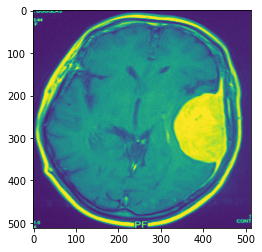

In [291]:
img = mpimg.imread('dataset/image/IMAGE_0652.jpg')
imgplot = plt.imshow(img[:,:,0])

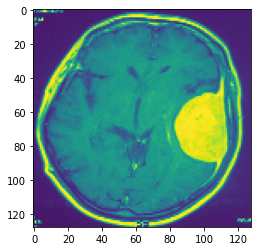

In [292]:
img = mpimg.imread('dataset/image/IMAGE_0652.jpg')
imgplot = plt.imshow(img[::4,::4,0])

In [293]:
print(img[:,:,0].flatten().shape)
print(img[::4,::4,0].flatten().shape)

(262144,)
(16384,)


In [294]:
image_list = []
for i in range(3000):
    image_list.append(f'dataset/image/IMAGE_{i:04}.jpg'.format(i))

In [295]:
X=[]
for image in image_list:
    X.append(mpimg.imread(image)[::4,::4,0].flatten())

In [296]:
X = np.array(X)

In [297]:
X.shape

(3000, 16384)

In [298]:
label = pd.read_csv('dataset/label.csv')
label.loc[:, 'tumor'] = (label.label!='no_tumor') # =1 if not(no_tumor) ==> 1=tumor

In [299]:
y=label.tumor*1

In [300]:
y.shape

(3000,)

In [301]:
np.sum(y)

2546

In [302]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [303]:
param_grid={'C':[0.1,1,10],'gamma':[0.01,0.1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
svm=GridSearchCV(svc, param_grid, verbose=10)

In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=24,stratify=y)

In [305]:
svm.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.850, total= 5.9min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.9min remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.850, total= 5.9min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.7min remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.848, total= 5.9min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 17.6min remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.848, total= 5.9min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 23.5min remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.848, total= 5.9min
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 29.4min remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.948, total= 2.6min
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 32.1min remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.921, total= 2.5min
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 34.6min remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.942, total= 2.6min
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 37.2min remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.927, total= 2.8min
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 40.0min remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=poly, score=0.933, total= 2.6min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.850, total= 5.9min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.850, total= 6.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.848, total= 5.9min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.848, total= 5.9min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.848, total= 6.1min
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.948, total= 2.7min
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 258.1min finished


The Model is trained well with the given images


In [306]:
svm.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}

In [307]:
y_pred = svm.predict(x_test)

In [308]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def evaluation(y,y_pred):
    # accuracy
    accuracy = accuracy_score(y,y_pred)
    print('accuracy: ', round(accuracy,2))
    # sensitivity: pos_label = 1
    sensitivity = recall_score(y,y_pred)
    print('sensitivity: ',round(sensitivity,2))
    # pos_label = 0 gives specificity
    specificity = recall_score(y,y_pred,pos_label = 0)
    print('specificity: ',round(specificity,2))
    # average recall 
    mean_recall = recall_score(y,y_pred,average='macro')
    print('mean recall: ',round(mean_recall,2))

In [309]:
evaluation(y_test, y_pred)

accuracy:  0.96
sensitivity:  0.99
specificity:  0.76
mean recall:  0.88


In [310]:
from sklearn.metrics import confusion_matrix

In [311]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(69, 22, 4, 505)

# Deep1 (ConvNet)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd

In [39]:
import tensorflow as tf
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
tf.__version__

'2.3.1'

In [88]:
image_list = []
for i in range(3000):
    image_list.append(f'IMAGE_{i:04}.jpg'.format(i))

In [89]:
label = pd.read_csv('dataset/label.csv')
label.loc[label.label!='no_tumor', 'tumor'] = 'tumor' # =1 if not(no_tumor) ==> 1=tumor
label.loc[label.label=='no_tumor', 'tumor'] = 'no_tumor'

In [90]:
df = pd.DataFrame(image_list, columns=['image'])

In [91]:
df['label'] = label.tumor

In [92]:
df_test = df.sample(500)
df_train = df.drop(df_test.index)

In [93]:
#data = tf.keras.preprocessing.image_dataset_from_directory(directory='dataset/', labels=y, 
#                                                           label_mode = 'binary', batch_size=64)

In [112]:
datagen=ImageDataGenerator(rescale=1./255.)
train_generator=datagen.flow_from_dataframe(
dataframe=df_train,
directory='dataset/image/',
x_col='image',
y_col='label',
batch_size=64,
seed=24,
shuffle=True,
class_mode='binary')

Found 2500 validated image filenames belonging to 2 classes.


In [113]:
test_generator=datagen.flow_from_dataframe(
dataframe=df_test,
directory='dataset/image/',
x_col='image',
y_col='label',
batch_size=64,
seed=24,
shuffle=False,
class_mode='binary')

Found 500 validated image filenames belonging to 2 classes.


In [313]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [350]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(df['label']),
                                                 df['label'])

class_weights

array([3.30396476, 0.58915947])

In [314]:
model.fit_generator(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = test_generator.n//test_generator.batch_size,
                    class_weight = {0:3.3, 1:0.6},
                    epochs=50)

Epoch 1/50
78/78 [==============================] - 58s 748ms/step - loss: 0.6381 - accuracy: 0.5843 - val_loss: 0.7369 - val_accuracy: 0.5833
Epoch 2/50
78/78 [==============================] - 61s 777ms/step - loss: 0.4770 - accuracy: 0.7982 - val_loss: 0.3759 - val_accuracy: 0.8854
Epoch 3/50
78/78 [==============================] - 55s 711ms/step - loss: 0.3548 - accuracy: 0.8748 - val_loss: 0.2683 - val_accuracy: 0.9042
Epoch 4/50
78/78 [==============================] - 55s 710ms/step - loss: 0.2968 - accuracy: 0.8971 - val_loss: 0.3158 - val_accuracy: 0.8771
Epoch 5/50
78/78 [==============================] - 55s 708ms/step - loss: 0.2474 - accuracy: 0.9080 - val_loss: 0.2746 - val_accuracy: 0.8917
Epoch 6/50
78/78 [==============================] - 55s 708ms/step - loss: 0.2161 - accuracy: 0.9190 - val_loss: 0.1774 - val_accuracy: 0.9438
Epoch 7/50
78/78 [==============================] - 55s 710ms/step - loss: 0.1893 - accuracy: 0.9263 - val_loss: 0.1805 - val_accuracy: 0.9354

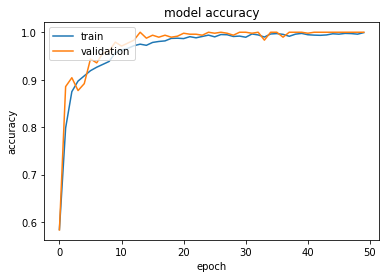

In [315]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(_)

In [316]:
y_pred = model.predict(test_generator)

1102    1.0
151     1.0
2685    0.0
2195    1.0
1467    1.0
       ... 
478     1.0
830     1.0
2421    1.0
574     1.0
1302    0.0
Name: tumor, Length: 500, dtype: float64

In [335]:
evaluation(df_test.tumor,y_pred>0.5)

accuracy:  0.96
sensitivity:  0.97
specificity:  0.88
mean recall:  0.93


---

# Deep2 (Transfer Learning) -- Disregard: Not performing well enough!

In [168]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [169]:
transfer_model = Sequential()
transfer_model.add(ResNet152V2(input_shape=(256, 256, 3), pooling='max', include_top=False, weights="imagenet", classes=2)) 
transfer_model.add(keras.layers.Dropout(0.3))
transfer_model.add(keras.layers.Flatten())
transfer_model.add(keras.layers.Dropout(0.5))
transfer_model.add(keras.layers.Dense(1, activation='sigmoid'))

transfer_model.layers[0].trainable = False

In [170]:
transfer_model.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [174]:
transfer_model.fit_generator(train_generator,
                         validation_data = train_generator,
                         steps_per_epoch = train_generator.n//train_generator.batch_size,
                         validation_steps = test_generator.n//test_generator.batch_size,
                         class_weight = {0:3.3, 1:0.6},
                         epochs=50)

Epoch 1/50
78/78 [==============================] - 169s 2s/step - loss: 0.5514 - accuracy: 0.8679 - val_loss: 0.5693 - val_accuracy: 0.8687
Epoch 2/50
78/78 [==============================] - 160s 2s/step - loss: 0.5407 - accuracy: 0.8707 - val_loss: 0.4716 - val_accuracy: 0.8854
Epoch 3/50
78/78 [==============================] - 157s 2s/step - loss: 0.5278 - accuracy: 0.8770 - val_loss: 0.5166 - val_accuracy: 0.8708
Epoch 4/50
78/78 [==============================] - 164s 2s/step - loss: 0.5199 - accuracy: 0.8699 - val_loss: 0.4888 - val_accuracy: 0.8771
Epoch 5/50
78/78 [==============================] - 162s 2s/step - loss: 0.5060 - accuracy: 0.8809 - val_loss: 0.4714 - val_accuracy: 0.8854
Epoch 6/50
78/78 [==============================] - 179s 2s/step - loss: 0.5045 - accuracy: 0.8797 - val_loss: 0.5323 - val_accuracy: 0.8292
Epoch 7/50
78/78 [==============================] - 171s 2s/step - loss: 0.5047 - accuracy: 0.8691 - val_loss: 0.4943 - val_accuracy: 0.8708
Epoch 8/50
78

In [177]:
y_pred = base_model.predict(test_generator)

In [185]:
df_test.loc[df_test.label=='tumor', 'tumor']=1
df_test.loc[df_test.label=='no_tumor', 'tumor'] = 0

In [187]:
y_test = df_test.tumor

In [224]:
evaluation(y_test,y_pred>0.62)

accuracy:  0.88
sensitivity:  0.89
specificity:  0.81
mean recall:  0.85


In [213]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred>0.62).ravel()
(tn, fp, fn, tp)

(56, 13, 46, 385)

---
---
---

# Task B

In [355]:
image_list = []
for i in range(3000):
    image_list.append(f'IMAGE_{i:04}.jpg'.format(i))

In [356]:
df = pd.DataFrame(image_list, columns=['image'])

In [357]:
label = pd.read_csv('dataset/label.csv')

In [359]:
label.label.value_counts()

glioma_tumor        860
meningioma_tumor    855
pituitary_tumor     831
no_tumor            454
Name: label, dtype: int64

In [360]:
df['label'] = label.label

In [362]:
df_test = df.sample(500)
df_train = df.drop(df_test.index)

In [370]:
datagen=ImageDataGenerator(rescale=1./255.)
train_generator=datagen.flow_from_dataframe(
dataframe=df_train,
directory='dataset/image/',
x_col='image',
y_col='label',
batch_size=64,
seed=24,
shuffle=True,
class_mode='categorical')

Found 2500 validated image filenames belonging to 4 classes.


In [371]:
test_generator=datagen.flow_from_dataframe(
dataframe=df_test,
directory='dataset/image/',
x_col='image',
y_col='label',
batch_size=64,
seed=24,
shuffle=False,
class_mode='categorical')

Found 500 validated image filenames belonging to 4 classes.


In [373]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(df['label']),
                                                 df['label'])

class_weights

array([0.87209302, 0.87719298, 1.65198238, 0.90252708])

In [372]:
multi_model = Sequential()
multi_model.add(BatchNormalization(input_shape = (256,256,3)))
#multi_model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
multi_model.add(Conv2D(32, (3, 3)))
multi_model.add(Activation('relu'))
multi_model.add(MaxPooling2D(pool_size=(2, 2)))

multi_model.add(Conv2D(32, (3, 3)))
multi_model.add(Activation('relu'))
multi_model.add(MaxPooling2D(pool_size=(2, 2)))

multi_model.add(Conv2D(64, (3, 3)))
multi_model.add(Activation('relu'))
multi_model.add(MaxPooling2D(pool_size=(2, 2)))

multi_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
multi_model.add(Dense(64))
multi_model.add(Activation('relu'))
multi_model.add(Dropout(0.5))
multi_model.add(Dense(num_classes))
multi_model.add(Activation('softmax'))

multi_model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(lr=0.0001),
                    metrics=['accuracy'])

In [374]:
multi_model.fit_generator(train_generator,
                          validation_data = train_generator,
                          steps_per_epoch = train_generator.n//train_generator.batch_size,
                          validation_steps = test_generator.n//test_generator.batch_size,
                          class_weight = {0:0.9, 1:0.9, 2:1.65, 3:0.9}, 
                          epochs=50)

Epoch 1/50
39/39 [==============================] - 56s 1s/step - loss: 1.3152 - accuracy: 0.3539 - val_loss: 1.1294 - val_accuracy: 0.6027
Epoch 2/50
39/39 [==============================] - 56s 1s/step - loss: 1.1140 - accuracy: 0.5583 - val_loss: 0.9298 - val_accuracy: 0.6540
Epoch 3/50
39/39 [==============================] - 56s 1s/step - loss: 0.9515 - accuracy: 0.6195 - val_loss: 0.7838 - val_accuracy: 0.7143
Epoch 4/50
39/39 [==============================] - 55s 1s/step - loss: 0.8662 - accuracy: 0.6630 - val_loss: 0.7171 - val_accuracy: 0.7098
Epoch 5/50
39/39 [==============================] - 58s 1s/step - loss: 0.7451 - accuracy: 0.7020 - val_loss: 0.5431 - val_accuracy: 0.7991
Epoch 6/50
39/39 [==============================] - 54s 1s/step - loss: 0.7440 - accuracy: 0.7044 - val_loss: 0.6065 - val_accuracy: 0.7679
Epoch 7/50
39/39 [==============================] - 55s 1s/step - loss: 0.6717 - accuracy: 0.7401 - val_loss: 0.5146 - val_accuracy: 0.8147
Epoch 8/50
39/39 [==

In [377]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = np.argmax(multi_model.predict(test_generator), axis=1)
y_test = df_test.label.values

In [414]:
y_test_labels = [train_generator.class_indices[x] for x in y_test]
y_labels = [x[:-6] for x in train_generator.class_indices.keys()]

In [415]:
y_labels

['glioma', 'meningioma', 'no', 'pituitary']

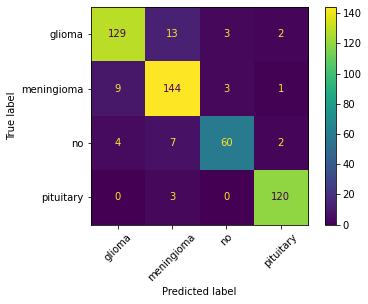

In [416]:
cm = confusion_matrix(y_test_labels, y_pred)
cm_vis = ConfusionMatrixDisplay(cm, display_labels=y_labels)

cm_vis.plot(cmap='viridis', xticks_rotation='45')
plt.show()

In [446]:
print('overall accuracy:', np.sum([cm[x,x] for x in range(len(y_labels))])*100/500, '%')

overall accuracy: 90.6 %


In [442]:
recall = [cm[x,x]/np.sum(cm, axis=1)[x] for x in range(len(y_labels))]
specificity = [cm[x,x]/np.sum(cm, axis=0)[x] for x in range(len(y_labels))]

In [443]:
for x in range(len(y_labels)):
    print('recall for '+y_labels[x]+':', round(recall[x]*100,2), '%')

recall for glioma: 87.76 %
recall for meningioma: 91.72 %
recall for no: 82.19 %
recall for pituitary: 97.56 %


In [445]:
for x in range(len(y_labels)):
    print('specificity for '+y_labels[x]+':', round(specificity[x]*100,2), '%')

specificity for glioma: 90.85 %
specificity for meningioma: 86.23 %
specificity for no: 90.91 %
specificity for pituitary: 96.0 %
